In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
df1 = pd.read_csv("data/arrival_time_COMPLETE.csv")
df2 = pd.read_csv("data/negative_duration_COMPLETE.csv")
df3 = pd.read_csv("data/negative_peak_time_COMPLETE.csv")
df4 = pd.read_csv("data/negative_pressure_COMPLETE.csv")
df5 = pd.read_csv("data/positive_duration_COMPLETE.csv")
df6 = pd.read_csv("data/positive_impulse_COMPLETE.csv")
df7 = pd.read_csv("data/positive_peak_time_COMPLETE.csv")
df8 = pd.read_csv("data/positive_pressure_COMPLETE.csv")

df1.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,5.0,0.010208
1,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,6.0,0.012350
2,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,7.0,0.014577
3,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,8.0,0.016878
4,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,9.0,0.019250


In [3]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated
# Doing Similarly for ID (Do we need dummy encoding ??)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,5.0,0.006817
1,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,6.0,0.007302
2,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,7.0,0.007816
3,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,8.0,0.008326
4,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,9.0,0.008817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,36.0,NaN
35996,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,37.0,NaN
35997,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,38.0,NaN
35998,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,39.0,NaN


In [4]:
X = df5.drop(['ID','Target'], axis=1)[:28800]
X

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,5.0
1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,6.0
2,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,7.0
3,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,8.0
4,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
28795,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,36.0
28796,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,37.0
28797,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,38.0
28798,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,39.0


In [5]:
y5 = df5['Target'][:28800]
y5

0        0.006817
1        0.007302
2        0.007816
3        0.008326
4        0.008817
           ...   
28795    0.012178
28796    0.012275
28797    0.012374
28798    0.012477
28799    0.012573
Name: Target, Length: 28800, dtype: float64

In [6]:
y1 = df1['Target'][:28800]
y2 = df2['Target'][:28800]
y3 = df3['Target'][:28800]
y4 = df4['Target'][:28800]
y6 = df6['Target'][:28800]
y7 = df7['Target'][:28800]
y8 = df8['Target'][:28800]

___

# Train-Test Set Split

In [7]:
X_traindf, X_testdf, y1_train, y1_test = train_test_split(X, y1, test_size=0.25, random_state=42)
print(X_traindf.shape)
print(X_testdf.shape)

(21600, 11)
(7200, 11)


In [12]:
y2_train, y2_test = train_test_split(y2, test_size=0.25, random_state=42)
y3_train, y3_test = train_test_split(y3, test_size=0.25, random_state=42)
y4_train, y4_test = train_test_split(y4, test_size=0.25, random_state=42)
y5_train, y5_test = train_test_split(y5, test_size=0.25, random_state=42)
y6_train, y6_test = train_test_split(y6, test_size=0.25, random_state=42)
y7_train, y7_test = train_test_split(y7, test_size=0.25, random_state=42)
y8_train, y8_test = train_test_split(y8, test_size=0.25, random_state=42)

In [9]:
y7_train.values

array([0.01284534, 0.01444022, 0.10035855, ..., 0.10251021, 0.07990494,
       0.01143898])

In [10]:
y8_train.values

array([1.1268162 , 0.62633157, 0.04595783, ..., 0.02130297, 0.13602383,
       2.3361142 ])

In [11]:
y_train = np.concatenate((y1_train.values.reshape(-1,1), y2_train.values.reshape(-1,1), y3_train.values.reshape(-1,1), 
                          y4_train.values.reshape(-1,1), y5_train.values.reshape(-1,1), y6_train.values.reshape(-1,1),
                          y7_train.values.reshape(-1,1), y8_train.values.reshape(-1,1)), axis=1)

y_test = np.concatenate((y1_test.values.reshape(-1,1), y2_test.values.reshape(-1,1), y3_test.values.reshape(-1,1), 
                          y4_test.values.reshape(-1,1), y5_test.values.reshape(-1,1), y6_test.values.reshape(-1,1),
                          y7_test.values.reshape(-1,1), y8_test.values.reshape(-1,1)), axis=1)

In [12]:
print(y_train.shape)
print(y_test.shape)

y_train

(21600, 8)
(7200, 8)


array([[1.11694350e-02, 1.56393350e-02, 2.44314220e-02, ...,
        2.86203890e+02, 1.28453400e-02, 1.12681620e+00],
       [1.24119570e-02, 1.88029450e-02, 2.82499930e-02, ...,
        1.80425900e+02, 1.44402250e-02, 6.26331570e-01],
       [9.50448220e-02, 1.51018300e-02, 1.09446822e-01, ...,
        1.49908640e+01, 1.00358550e-01, 4.59578340e-02],
       ...,
       [9.67233260e-02, 9.91223000e-03, 1.08929812e-01, ...,
        7.44885020e+00, 1.02510210e-01, 2.13029660e-02],
       [7.58939240e-02, 2.09730370e-02, 9.80206378e-02, ...,
        6.19014550e+01, 7.99049360e-02, 1.36023830e-01],
       [1.00712810e-02, 3.38855160e-02, 3.30022184e-02, ...,
        7.96478820e+02, 1.14389770e-02, 2.33611420e+00]])

In [13]:
y_test

array([[9.36676340e-02, 1.85481800e-02, 1.16362342e-01, ...,
        3.87540700e+01, 9.85093640e-02, 8.02679810e-02],
       [1.88341180e-02, 1.49853250e-02, 3.32267860e-02, ...,
        1.10768800e+02, 2.12428740e-02, 3.99188070e-01],
       [4.82065450e-02, 2.26087420e-02, 7.29268908e-02, ...,
        9.14076770e+01, 5.16740420e-02, 1.84897880e-01],
       ...,
       [7.48656170e-02, 1.68266440e-02, 9.27517236e-02, ...,
        3.51032030e+01, 7.93257060e-02, 9.26706940e-02],
       [1.48923780e-02, 2.82288120e-02, 3.50396958e-02, ...,
        3.61880250e+02, 1.65773410e-02, 1.17031230e+00],
       [4.29282640e-02, 7.86490400e-03, 5.24556696e-02, ...,
        1.25165350e+01, 4.73894250e-02, 4.77122370e-02]])

___

# Standardization and Power Transform

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [15]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [16]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(X_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [17]:
quantile = QuantileTransformer(output_distribution='normal')

y_train_normal = quantile.fit_transform(y_train)
y_test_normal = quantile.transform(y_test)

In [18]:
y_test_normal[1:41, 7]

array([ 1.0197092 ,  0.33428349, -0.71517926,  2.24232066,  1.86359402,
       -0.74523355, -0.4648274 , -0.2268882 , -0.75649043, -2.09079023,
       -0.55463441,  0.75038709, -0.03604441,  0.25850177,  1.95536698,
        0.14818542,  0.53428356, -0.76673673,  0.53672479, -0.23066606,
       -0.14865688,  0.41007522,  1.43976542,  0.18550623, -0.37067758,
       -0.82626052,  1.35012437, -1.40802512, -2.21909141, -0.44441688,
       -0.75462019,  1.19340742,  0.80011561,  0.54253131,  0.33034992,
        1.98874773,  1.62697118, -0.53849423,  0.35250048,  2.31339542])

In [19]:
y_test_check = quantile.inverse_transform(y_test_normal)
y_test_check[1:41,7]

array([0.39918807, 0.18489788, 0.07076792, 1.603528  , 1.0806105 ,
       0.06908134, 0.08818348, 0.10897039, 0.06826332, 0.01860524,
       0.08134046, 0.28987974, 0.12975076, 0.17156978, 1.2115381 ,
       0.15436813, 0.22705919, 0.06763056, 0.22765867, 0.10868868,
       0.11713055, 0.19952142, 0.66621888, 0.15975925, 0.09596858,
       0.06414993, 0.59720933, 0.03660972, 0.01633277, 0.08981635,
       0.06839496, 0.49123496, 0.30692583, 0.2290165 , 0.18374079,
       1.2546521 , 0.83790588, 0.08270955, 0.18826026, 1.7111793 ])

In [20]:
y_test[1:41,7]

array([0.39918807, 0.18489788, 0.07076792, 1.603528  , 1.0806105 ,
       0.06908134, 0.08818348, 0.10897039, 0.06826332, 0.01860524,
       0.08134046, 0.28987974, 0.12975076, 0.17156978, 1.2115381 ,
       0.15436813, 0.22705919, 0.06763056, 0.22765867, 0.10868868,
       0.11713055, 0.19952142, 0.66621888, 0.15975925, 0.09596858,
       0.06414993, 0.59720933, 0.03660972, 0.01633277, 0.08981635,
       0.06839496, 0.49123496, 0.30692583, 0.2290165 , 0.18374079,
       1.2546521 , 0.83790588, 0.08270955, 0.18826026, 1.7111793 ])

In [21]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(y_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

___

# ANN

In [22]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled

(8500, True)

In [23]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y_train_torch = torch.from_numpy(y_train_normal.astype(np.float32))
y_test_torch = torch.from_numpy(y_test_normal.astype(np.float32))


print(X_train_torch)

tensor([[ 0.1781, -0.9747, -1.5140,  ..., -0.7230, -0.7424, -1.4851],
        [-0.5207,  0.5219,  0.0684,  ..., -0.3853,  1.3470, -1.4851],
        [ 1.3911,  1.5275, -0.7228,  ...,  1.1182, -0.7424,  1.3998],
        ...,
        [-1.6514,  0.5764, -1.2503,  ...,  0.7199,  1.3470,  1.3998],
        [ 0.9835,  0.0136, -0.7228,  ..., -0.4908, -0.7424,  0.9190],
        [ 1.3715,  0.0745,  0.3321,  ...,  0.5537,  1.3470, -1.4851]])


In [24]:
y_train_torch

tensor([[-1.7290, -0.1825, -1.7822,  ...,  1.7153, -1.7731,  1.8945],
        [-1.5605,  0.3168, -1.4323,  ...,  1.2409, -1.5663,  1.3875],
        [ 1.4714, -0.2850,  1.1074,  ..., -1.2251,  1.4889, -1.1817],
        ...,
        [ 1.5913, -1.5754,  1.0800,  ..., -1.9514,  1.6349, -1.9590],
        [ 0.6395,  0.5629,  0.6927,  ...,  0.1485,  0.6236,  0.0151],
        [-1.9274,  2.0287, -1.1576,  ...,  2.8862, -2.0276,  2.6981]])

In [25]:
y_test_torch

tensor([[ 1.3816,  0.2827,  1.4829,  ..., -0.3075,  1.3684, -0.5699],
        [-1.0928, -0.3107, -1.1451,  ...,  0.7363, -1.0969,  1.0197],
        [-0.1113,  0.7614,  0.0336,  ...,  0.5406, -0.1180,  0.3343],
        ...,
        [ 0.6086,  0.0336,  0.5384,  ..., -0.4086,  0.6064, -0.4105],
        [-1.3440,  1.4611, -1.0647,  ...,  1.9779, -1.3778,  1.9265],
        [-0.2490, -2.1335, -0.4783,  ..., -1.3961, -0.2252, -1.1426]])

In [26]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y_train_torch[i] 
                     ])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y_test_torch[i]
                     ])


# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=0)                                                                   # Increasing num_workers slow down the training because it does not use GPU at all
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=0)

In [27]:
for x,y in train_loader:
    print(y)
    # break

tensor([[-1.7290, -0.1825, -1.7822,  ...,  1.7153, -1.7731,  1.8945],
        [-1.5605,  0.3168, -1.4323,  ...,  1.2409, -1.5663,  1.3875],
        [ 1.4714, -0.2850,  1.1074,  ..., -1.2251,  1.4889, -1.1817],
        ...,
        [ 0.8358, -0.0945,  0.8934,  ..., -0.7314,  0.8505, -1.0485],
        [-0.8206,  0.8322, -0.6906,  ...,  1.3263, -0.8403,  1.2101],
        [ 0.2861,  1.0838,  0.4119,  ...,  0.6527,  0.2623,  0.4181]])
tensor([[-0.5300, -2.0834, -0.7918,  ..., -0.8972, -0.5132, -0.4180],
        [-0.9009, -1.6717, -1.1690,  ..., -0.1349, -0.8938,  0.5568],
        [ 1.4466, -0.0538,  1.5691,  ..., -0.8411,  1.4696, -1.2969],
        ...,
        [ 1.3805,  0.5386,  1.6099,  ..., -0.4543,  1.3940, -0.9163],
        [ 2.4348, -0.6237,  1.6922,  ..., -2.1980,  2.4790, -2.2859],
        [-0.1717,  0.7099, -0.0818,  ...,  0.8580, -0.1884,  0.6773]])
tensor([[ 0.2020, -0.7115,  0.1271,  ..., -0.5994,  0.2110, -0.5918],
        [-0.0059, -0.2115, -0.0668,  ..., -0.0512, -0.0085,  0

In [28]:
## Define the NN architecture
## NN with 3 hidden layer, s=[26, 256, 256, 256, 8]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The final layer has 8 output neuron
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 8)


        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add fourth fully connected layer
        x = self.fc4(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add final fully connected layers
        output = self.fc5(x)
       
        return output

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=8, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (mish): Mish()
)


In [29]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [30]:
n_epochs = 200 

model.to(device)    # bring the model to gpu
model.train()       # prep model for training

train_losses = []
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, target = data.to(device), target.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))

Epoch: 1/200 	Training Loss: 0.078495
Epoch: 2/200 	Training Loss: 0.023879
Epoch: 3/200 	Training Loss: 0.020733
Epoch: 4/200 	Training Loss: 0.018966
Epoch: 5/200 	Training Loss: 0.016620
Epoch: 6/200 	Training Loss: 0.015690
Epoch: 7/200 	Training Loss: 0.015347
Epoch: 8/200 	Training Loss: 0.015341
Epoch: 9/200 	Training Loss: 0.014642
Epoch: 10/200 	Training Loss: 0.013157
Epoch: 11/200 	Training Loss: 0.012930
Epoch: 12/200 	Training Loss: 0.012844
Epoch: 13/200 	Training Loss: 0.012289
Epoch: 14/200 	Training Loss: 0.012912
Epoch: 15/200 	Training Loss: 0.011364
Epoch: 16/200 	Training Loss: 0.011578
Epoch: 17/200 	Training Loss: 0.011783
Epoch: 18/200 	Training Loss: 0.011517
Epoch: 19/200 	Training Loss: 0.011187
Epoch: 20/200 	Training Loss: 0.010974
Epoch: 21/200 	Training Loss: 0.010349
Epoch: 22/200 	Training Loss: 0.011515
Epoch: 23/200 	Training Loss: 0.011119
Epoch: 24/200 	Training Loss: 0.011643
Epoch: 25/200 	Training Loss: 0.011250
Epoch: 26/200 	Training Loss: 0.01

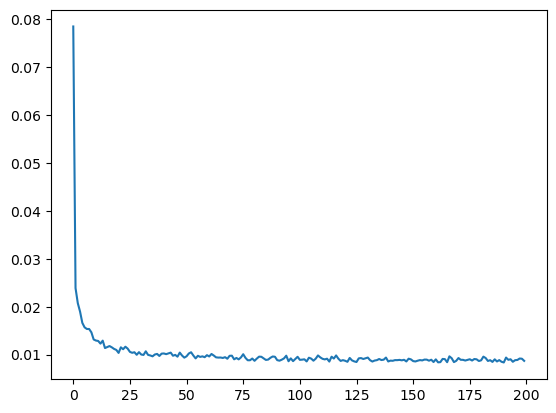

In [31]:
plt.plot(train_losses)

# Save the model  -- I already saved this and submitted
torch.save(model.state_dict(), 'PyTorch_Model/NN_mish_Drop_L2_Huber_Extra128_200Epoch_Quantile.pt')

**Loading the saved state**

In [32]:
# model.load_state_dict(torch.load('PyTorch_Model/NN_mish_Drop_L2_Huber_200Epoch_Quantile.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y_predNN_torch = model(X_test_torch.to(device))

y_predNN_normal = y_predNN_torch.cpu().numpy()     # convert to numpy array
y_test_normal = y_test_torch.cpu().numpy()
print(y_predNN_normal)

[[ 1.2772653   0.47560936  1.4385734  ... -0.20668665  1.2563114
  -0.48045057]
 [-0.99022037 -0.32078427 -1.0326473  ...  0.6787401  -0.9912824
   0.9388323 ]
 [-0.17263769  0.87897694 -0.02790673 ...  0.6185683  -0.17573412
   0.39813843]
 ...
 [ 0.59163654 -0.01064622  0.5184686  ... -0.37825137  0.58817
  -0.3988412 ]
 [-1.2942623   1.4113775  -0.9939901  ...  1.8934125  -1.3299655
   1.7983557 ]
 [-0.2644971  -1.9108483  -0.5045444  ... -1.2538246  -0.2387816
  -0.9137027 ]]


In [33]:
mape = mean_absolute_percentage_error(y_test_normal, y_predNN_normal)
r2 = r2_score(y_test_normal, y_predNN_normal)
print(f"Neural Network scores in normal distribution: r2 = {r2}, mape = {mape}")

Neural Network scores in normal distribution: r2 = 0.9876143214406887, mape = 0.416534960269928


In [34]:
y_predNN = quantile.inverse_transform(y_predNN_normal)
mape = mean_absolute_percentage_error(y_test, y_predNN.astype('float64'))
r2 = r2_score(y_test, y_predNN)

print(f"Neural Network scores in actual distribution: r2 = {r2}, mape = {mape}")

Neural Network scores in actual distribution: r2 = 0.9843538716088607, mape = 0.04412047054243462


In [68]:
y_predNN[1:41,7]

array([0.40293893, 0.18692414, 0.06679379, 1.5731983 , 1.1409516 ,
       0.07116825, 0.08229017, 0.11094648, 0.0684045 , 0.01790491,
       0.076277  , 0.28509498, 0.13568424, 0.17459093, 1.2293346 ,
       0.14248492, 0.21850143, 0.06556914, 0.22037481, 0.10233872,
       0.11252213, 0.19777906, 0.69064593, 0.15893647, 0.09778114,
       0.06329427, 0.52257925, 0.03382068, 0.0137039 , 0.08567823,
       0.06398399, 0.49113005, 0.31454965, 0.22651668, 0.17856087,
       1.3262647 , 0.9491288 , 0.08730866, 0.17905883, 1.7284456 ],
      dtype=float32)

In [69]:
y_test[1:41,7]

array([0.39918807, 0.18489788, 0.07076792, 1.603528  , 1.0806105 ,
       0.06908134, 0.08818348, 0.10897039, 0.06826332, 0.01860524,
       0.08134046, 0.28987974, 0.12975076, 0.17156978, 1.2115381 ,
       0.15436813, 0.22705919, 0.06763056, 0.22765867, 0.10868868,
       0.11713055, 0.19952142, 0.66621888, 0.15975925, 0.09596858,
       0.06414993, 0.59720933, 0.03660972, 0.01633277, 0.08981635,
       0.06839496, 0.49123496, 0.30692583, 0.2290165 , 0.18374079,
       1.2546521 , 0.83790588, 0.08270955, 0.18826026, 1.7111793 ])

In [70]:
y_test

array([[9.36676340e-02, 1.85481800e-02, 1.16362342e-01, ...,
        3.87540700e+01, 9.85093640e-02, 8.02679810e-02],
       [1.88341180e-02, 1.49853250e-02, 3.32267860e-02, ...,
        1.10768800e+02, 2.12428740e-02, 3.99188070e-01],
       [4.82065450e-02, 2.26087420e-02, 7.29268908e-02, ...,
        9.14076770e+01, 5.16740420e-02, 1.84897880e-01],
       ...,
       [7.48656170e-02, 1.68266440e-02, 9.27517236e-02, ...,
        3.51032030e+01, 7.93257060e-02, 9.26706940e-02],
       [1.48923780e-02, 2.82288120e-02, 3.50396958e-02, ...,
        3.61880250e+02, 1.65773410e-02, 1.17031230e+00],
       [4.29282640e-02, 7.86490400e-03, 5.24556696e-02, ...,
        1.25165350e+01, 4.73894250e-02, 4.77122370e-02]])

In [71]:
y_test_normal

array([[ 1.3816304 ,  0.28268605,  1.4829322 , ..., -0.30745506,
         1.3684012 , -0.5699484 ],
       [-1.0927829 , -0.31069657, -1.1450505 , ...,  0.7362669 ,
        -1.0969453 ,  1.0197092 ],
       [-0.11125448,  0.76144725,  0.03355394, ...,  0.54064226,
        -0.11799674,  0.33428347],
       ...,
       [ 0.60861874,  0.03356267,  0.5383628 , ..., -0.40858847,
         0.60639787, -0.4104572 ],
       [-1.3439791 ,  1.4611413 , -1.0646684 , ...,  1.977942  ,
        -1.3777595 ,  1.9264768 ],
       [-0.24901262, -2.1335402 , -0.47832558, ..., -1.3961294 ,
        -0.22524492, -1.1426171 ]], dtype=float32)

In [72]:
y_predNN_normal

array([[ 1.3745447 ,  0.39098334,  1.541328  , ..., -0.3063252 ,
         1.3605843 , -0.5498472 ],
       [-1.0866694 , -0.32501316, -1.165355  , ...,  0.7668543 ,
        -1.1000178 ,  1.0265232 ],
       [-0.08239491,  0.81565875,  0.05113338, ...,  0.5583257 ,
        -0.08981794,  0.34370404],
       ...,
       [ 0.6009814 , -0.14309058,  0.5339893 , ..., -0.49559617,
         0.6055057 , -0.4972145 ],
       [-1.2923795 ,  1.4716097 , -1.0610684 , ...,  1.9973941 ,
        -1.3589212 ,  1.9229813 ],
       [-0.2747004 , -1.994422  , -0.48124322, ..., -1.3523613 ,
        -0.23567753, -1.0565274 ]], dtype=float32)

In [80]:
# Negative Pressure
print("Negative Pressure")
print(y_predNN[:,3])
print()


# Positive Impulse
print("Positive Impulse")
print(y_predNN[:,5])
print()

# Positive Pressure
print("Positive Pressure")
print(y_predNN[:,7])

Negative Pressure
[-0.05803021 -0.18981701 -0.11518781 ... -0.05726141 -0.302009
 -0.04012128]

Positive Impulse
[ 38.80099  113.936646  92.900665 ...  32.103645 366.63266   13.11972 ]

Positive Pressure
[0.08168865 0.40293893 0.18692414 ... 0.08577602 1.1673032  0.0519053 ]
